In [4]:
#Load libraries
library(ggplot2)
library(ggmap)
library(stringr)
library(plyr)
library(lubridate)


Attaching package: ‘lubridate’

The following object is masked from ‘package:plyr’:

    here

The following object is masked from ‘package:base’:

    date



In [ ]:
https://www.kaggle.com/zusmani/us-mass-shootings-last-50-years/downloads/Mass%20Shootings%20Dataset%20Ver%202.csv"

In [3]:
#Load data
mass <- read.csv("https://www.kaggle.com/zusmani/us-mass-shootings-last-50-years/downloads/Mass%20Shootings%20Dataset%20Ver%202.csv", header = TRUE)

In [1]:
head(mass)

Title,Location,Date,Summary,Fatalities,Injured,Total victims,Mental Health Issues,Race,Gender,Latitude,Longitude
Las Vegas Strip mass shooting,"Las Vegas, NV",10/1/2017,NA,58,527,585,Unclear,White,M,36.18127,-115.1341
San Francisco UPS shooting,"San Francisco, CA",6/14/2017,"Jimmy Lam, 38, fatally shot three coworkers and wounded two others inside a UPS facility in San Francisco. Lam killed himself as law enforcement officers responded to the scene.",3,2,5,Yes,Asian,M,NA,NA
Pennsylvania supermarket shooting,"Tunkhannock, PA",6/7/2017,"Randy Stair, a 24-year-old worker at Weis grocery fatally shot three of his fellow employees. He reportedly fired 59 rounds with a pair of shotguns before turning the gun on himself as another co-worker fled the scene for help and law enforcement responded.",3,0,3,Unclear,White,M,NA,NA
Florida awning manufacturer shooting,"Orlando, Florida",6/5/2017,"John Robert Neumann, Jr., 45, a former employee of manufacturer Fiamma Inc. fatally shot five workers at the company, and then killed himself on the scene. He'd been fired from the company in April. The attack took place a week before the one-year anniversary of the Orlando nightclub massacre.",5,0,5,Unclear,NA,M,NA,NA
Rural Ohio nursing home shooting,"Kirkersville, Ohio",5/12/2017,"Thomas Hartless, 43, shot and killed a former girlfriend and another employee of a nursing home, and then fatally shot the Kirkersville police chief responding to the scene. Hartless' former girlfriend had recently obtained a court protection order against Hartless. Investigators later found more than 60 firearms in the home of Hartless, who was also found dead at the scene of the attack.",3,0,3,Yes,White,M,NA,NA
Fresno downtown shooting,"Fresno, California",4/18/2017,"Kori Ali Muhammad, 39, opened fire along a street in downtown Fresno, killing three people randomly in an alleged hate crime prior to being apprehended by police. Muhammad, who is black, killed three white victims and later described his attack as being racially motivated; he also reportedly yelled 'Allahu Akbar' at the time he was arrested, but authorities indicated they found no links to Islamist terrorism.",3,0,3,Unclear,Black,M,NA,NA


In [2]:
#fix dates
mass$Date <- as.Date(paste(mass$Date), "%m/%d/%Y")

In [7]:
#Remove N/A from the data frame
mass <- na.omit(mass)

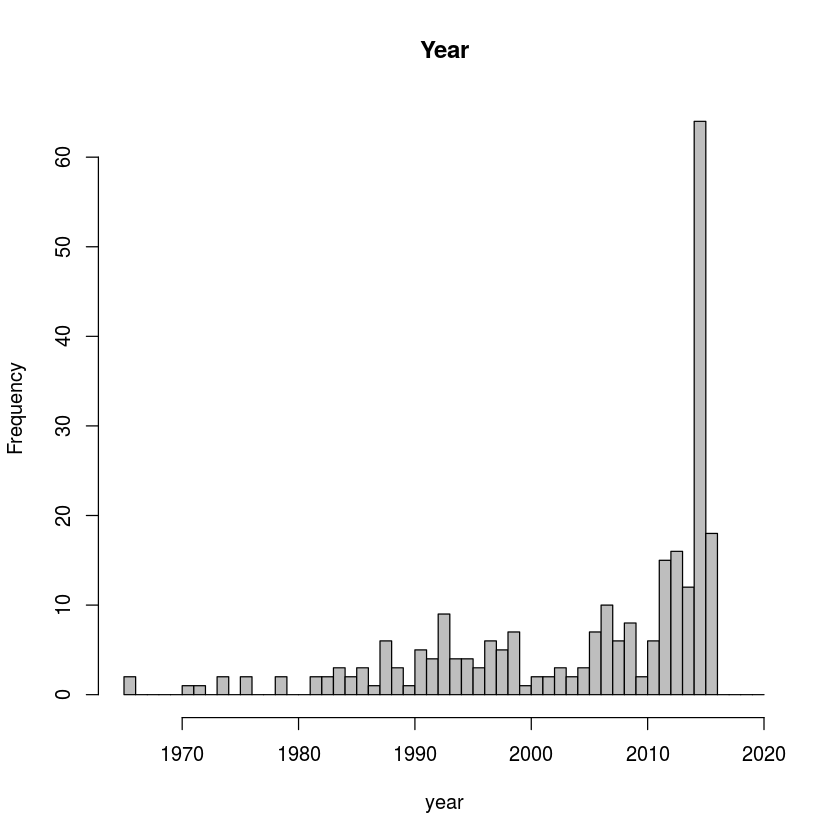

In [35]:
#looking at increase in mass shooting each year
#Year
year <- str_sub(date,1, 4)
year <- as.numeric(year)
years <- c(1965:2020)
hist(year, col = "grey", main = "Year", breaks=years)

In [46]:
table(year)

year
1966 1971 1972 1974 1976 1979 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 
   2    1    1    2    2    2    2    2    3    2    3    1    6    3    1    5 
1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 
   4    9    4    4    3    6    5    7    1    2    2    3    2    3    7   10 
2008 2009 2010 2011 2012 2013 2014 2015 2016 
   6    8    2    6   15   16   12   64   18 

This histogram shows that mass shooting in america have increased since 1966. With 2015 and 2016 having the most shooting in the past 50 years.

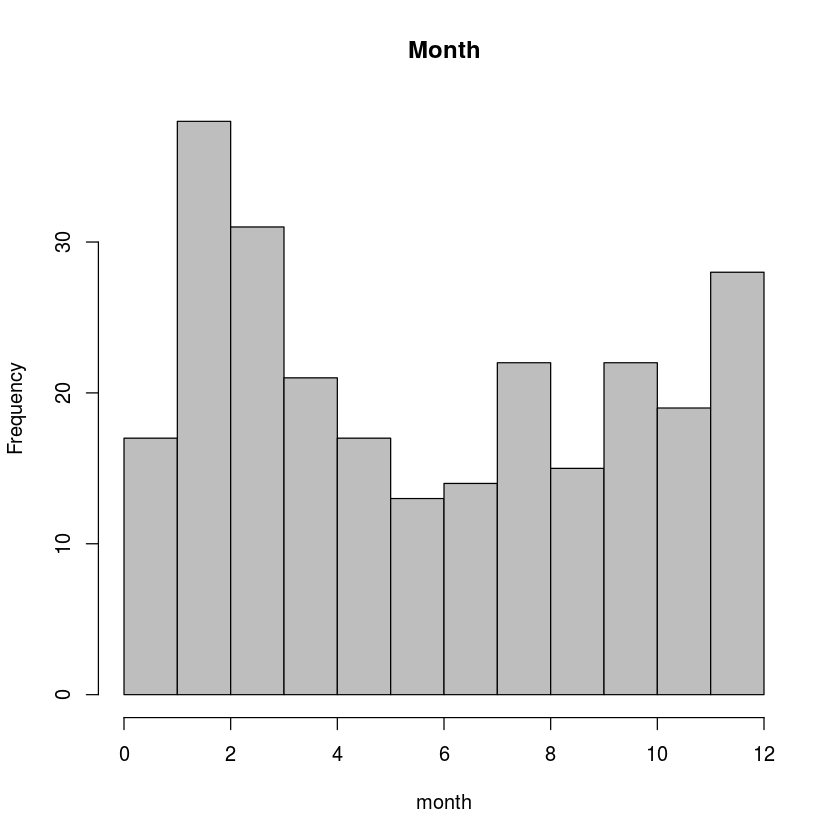

In [38]:
#Month
month <- str_sub(date, 6, 7)
month <- as.numeric(month)
months <- c(0:12)
hist(month, col = "grey", main = "Month", breaks=months)

In [47]:
table(month)

month
 1  2  3  4  5  6  7  8  9 10 11 12 
17 38 31 21 17 13 14 22 15 22 19 28 

This histogram looks at each month from this it would appear that February followed by March has had the most mass shooting the past 51 years. ALthough, it would appear that there are less shooting in the summer months.

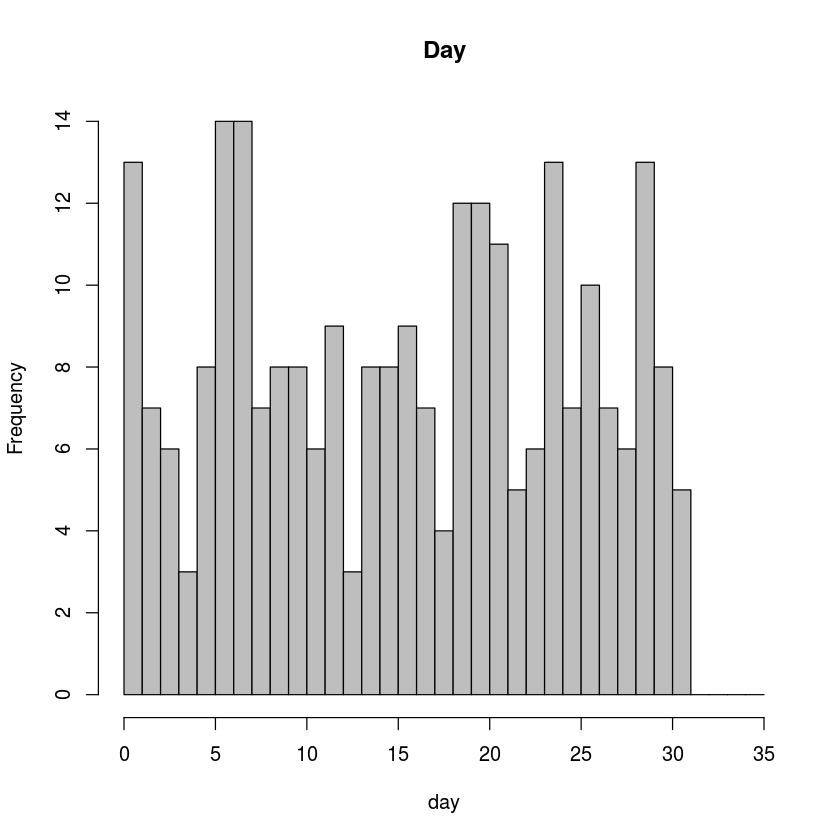

In [48]:
#Day
day <- str_sub(date,9,10)
day <- as.numeric(day)
days <- c(0:35)
hist(day, col = "grey", main = "Day", breaks=days)

In [49]:
table(day)

day
 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
13  7  6  3  8 14 14  7  8  8  6  9  3  8  8  9  7  4 12 12 11  5  6 13  7 10 
27 28 29 30 31 
 7  6 13  8  5 

This histogram shows that there is no particular day that mas shooting are likely to occur. 

[[1]]
[1] 52

[[2]]
[1] 43

[[3]]
[1] 34

[[4]]
[1] 44

[[5]]
[1] 57

[[6]]
[1] 51

[[7]]
[1] 39

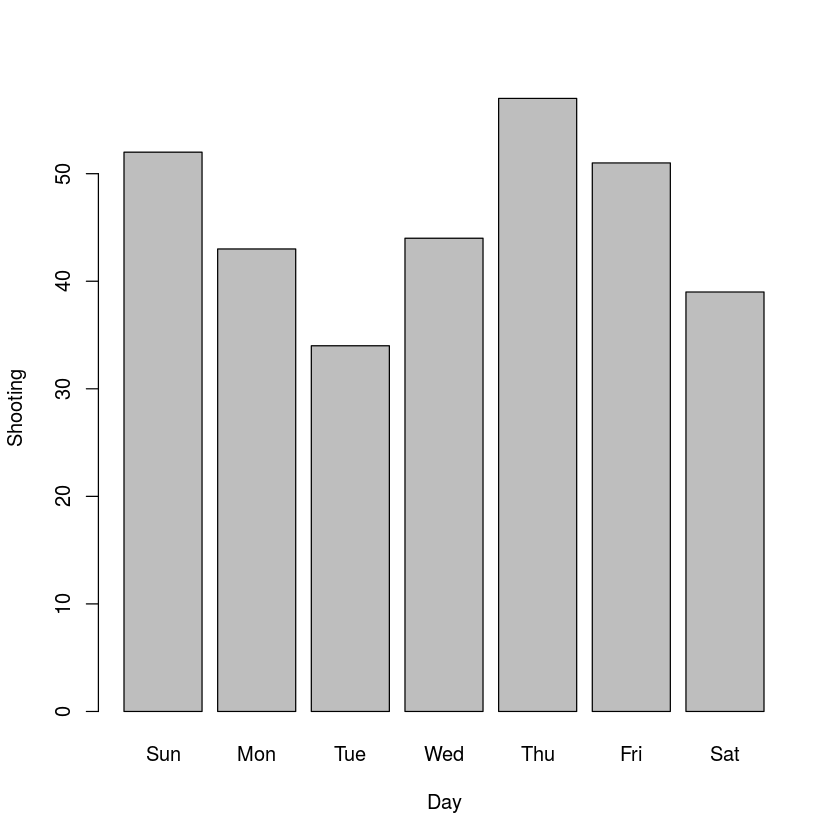

In [12]:
#Day of the week
weekday <- as.Date(betterDates)
freqs <- aggregate(weekday ~ wday, FUN=length)
lapply(freqs$weekday, as.numeric)

barplot(freqs$weekday,
        ylab = "Shooting", 
        xlab = "Day", 
        names.arg = c("Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"))